# DAFTAR ISI
1. Mengumpulkan dataset
2. Menelaah data
3. Menvalidasi data
4. Menentukan Objek
5. Membersihkan data
6. Transformasi data
7. Menentukan label data
8. Pemodelan
9. Mengevaluasi model
10. Optimalisasi model

##1) Mengumpulkan dataset
Data yang digunakan merupakan data tentang fetal health  yang berisi kumpulan data CTG yang digunakan untuk menilai kesehatan janin yang digunakan profesional kesehatan untuk mengambil tindakan untuk mencegah kematian anak dan ibu.  Data ini berjumlah 2126 yang terdiri dari 22 kolom dengan 21 fature dan 1 target. Data ini sendiri bersumber dari https://drive.google.com/file/d/1tNtzZ25FPpZ1-ooy9LNsgzNg8FCVdQ6Z/view

 Features :
 1. 'baseline value' FHR baseline (beats per minute)
 2. 'accelerations' Number of accelerations per second
 3. 'fetal_movement' Number of fetal movements per second
 4. 'uterine_contractions' Number of uterine contractions per second
 5. 'light_decelerations' Number of light decelerations per second
 6. 'severe_decelerations' Number of severe decelerations per second
 7. 'prolongued_decelerations' Number of prolonged decelerations per second
 8. 'abnormal_short_term_variability' Percentage of time with abnormal short
 term variability
 9. 'mean_value_of_short_term_variability' Mean value of short term variability
 10. 'percentage_of_time_with_abnormal_long_term_variability' Percentage of
 time with abnormal long term variability
 11. 'mean_value_of_long_term_variability' Mean value of long term variability
 12. 'histogram_width' Width of FHR histogram
 13. 'histogram_min' Minimum (low frequency) of FHR histogram
 14. 'histogram_max' Maximum (high frequency) of FHR histogram
 15. 'histogram_number_of_peaks' Number of histogram peaks
 16. 'histogram_number_of_zeroes' Number of histogram zeros
 17. 'histogram_mode' Histogram mode
 18. 'histogram_mean' Histogram mean
 19. 'histogram_median' Histogram median
 20. 'histogram_variance' Histogram variance
 21. 'histogram_tendency' Histogram tendency

 Target :
 1. 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)


In [ ]:
# import library yang dibutuhkan
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler


In [ ]:
# hubungkan colab dengan drive
#drive.mount("/content/drive")

##2) Menelaah Data

In [ ]:
#load dataset
dataset=pd.read_csv('fetal_health.csv')
#dataset=pd.read_csv("drive/MyDrive/BK/Tugas Data Science 1/fetal_health.csv")

In [ ]:
# menampilkan 5 dataset teratas
dataset.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,NaN,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
# menampilkan 5 dataset paling bawah
dataset.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,NaN,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [ ]:
#menampilkan dimensi data dengan array
dataset.shape

(2126, 22)

In [ ]:
# menampilkan ringkasan dataset
dataset.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,1914.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004372,0.001889,0.000003,0.000158,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.477011,134.610536,138.090310,19.020899,0.319749,1.304327
std,9.840844,0.003866,0.046666,0.002953,0.002960,0.000057,0.000592,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.434563,15.593596,14.466589,29.628676,0.610208,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


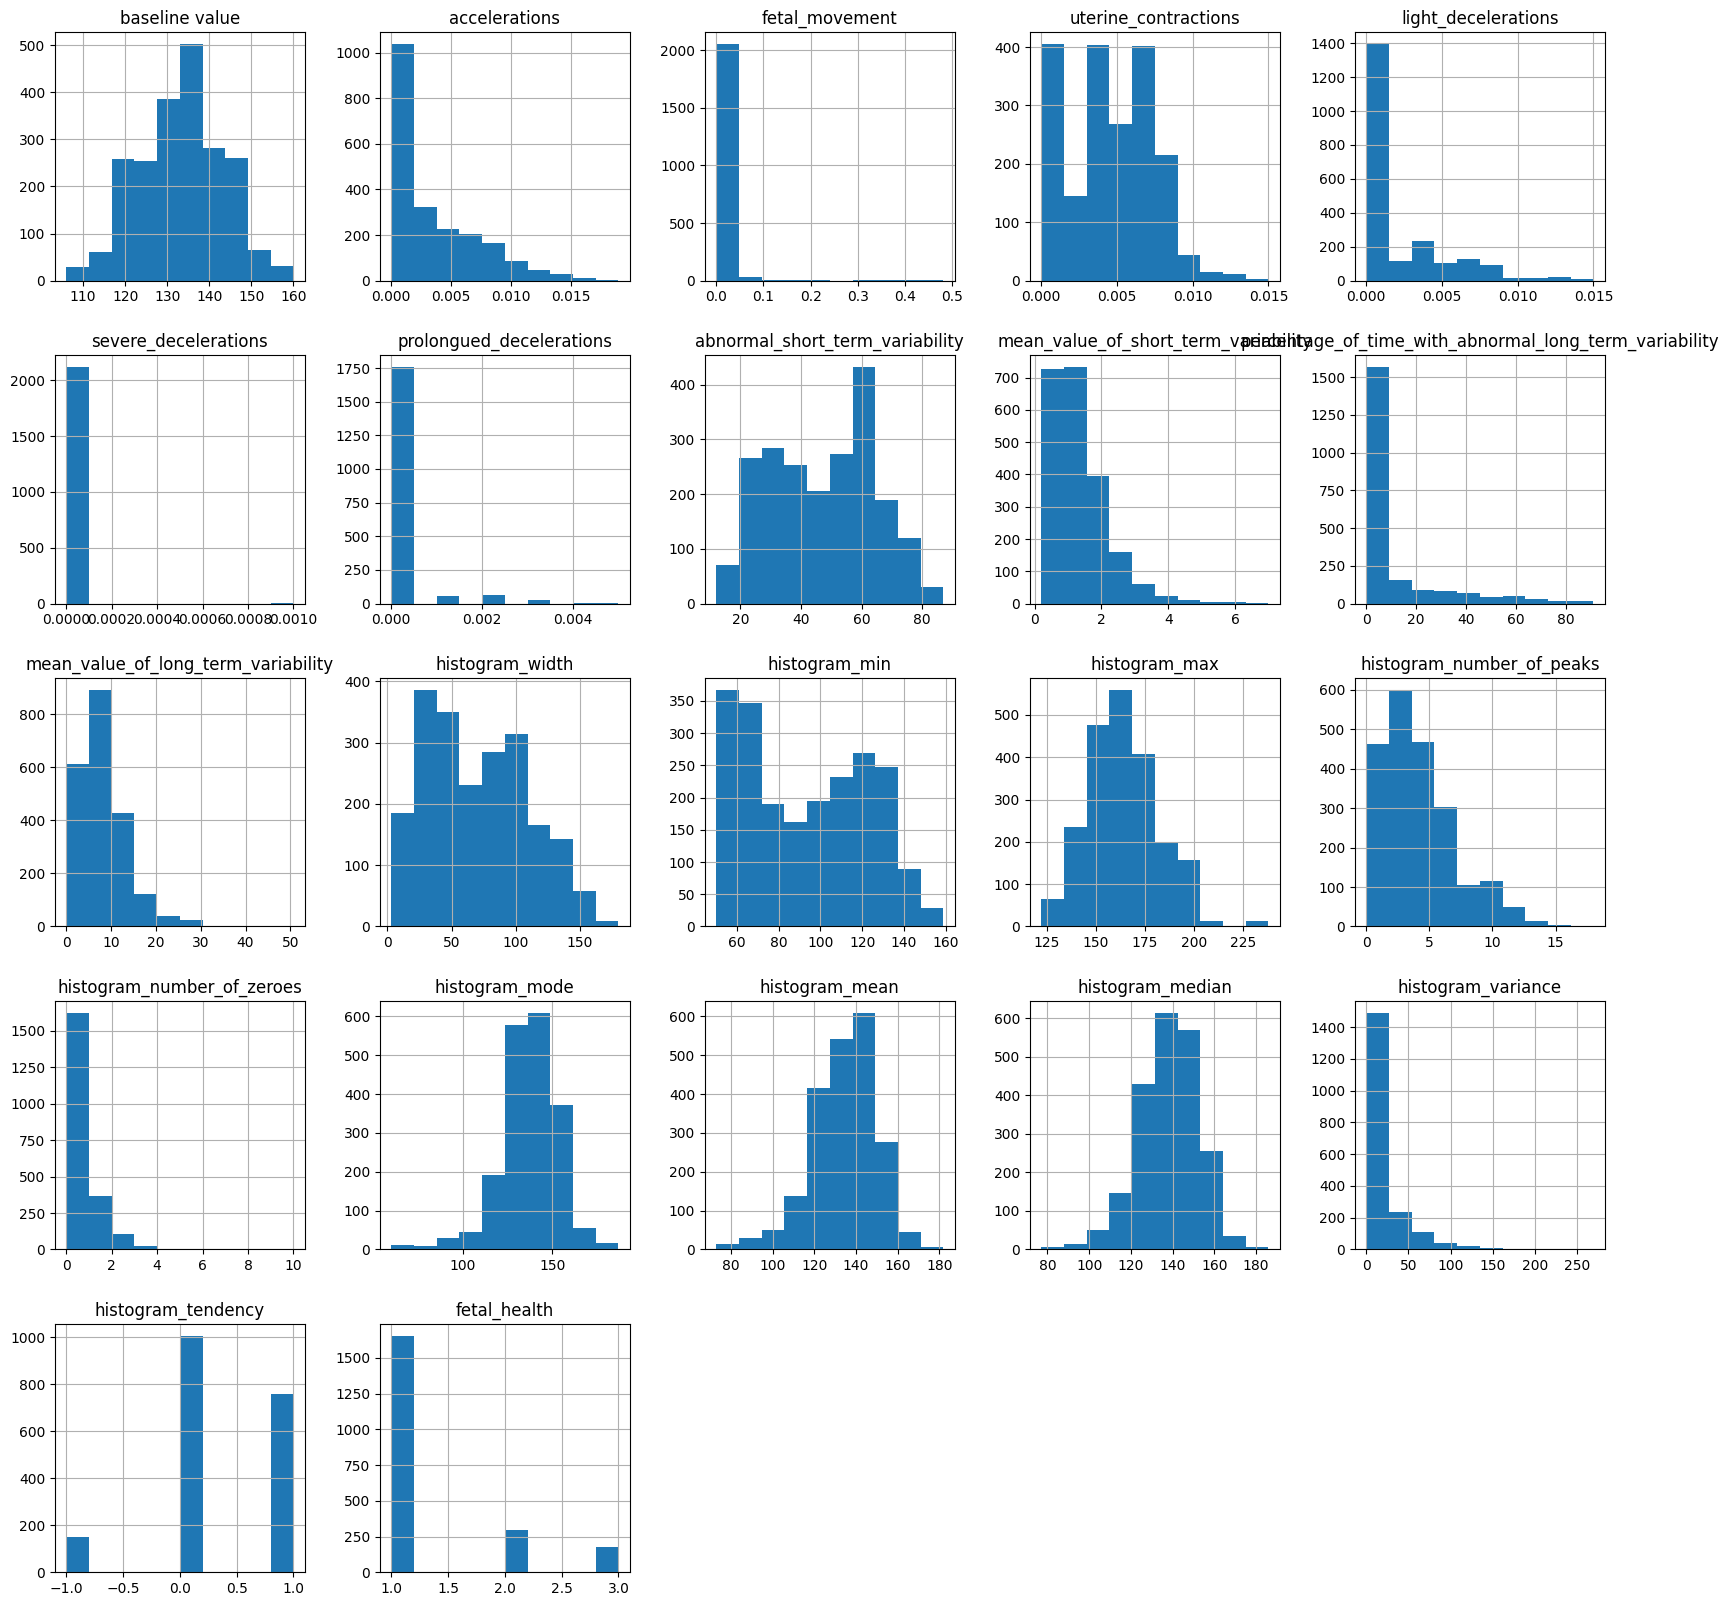

In [ ]:
#menampilkan distribusi data dengan univariat dengan histogram
data_hist_plot = dataset.hist(figsize = (20,20))

<Axes: >

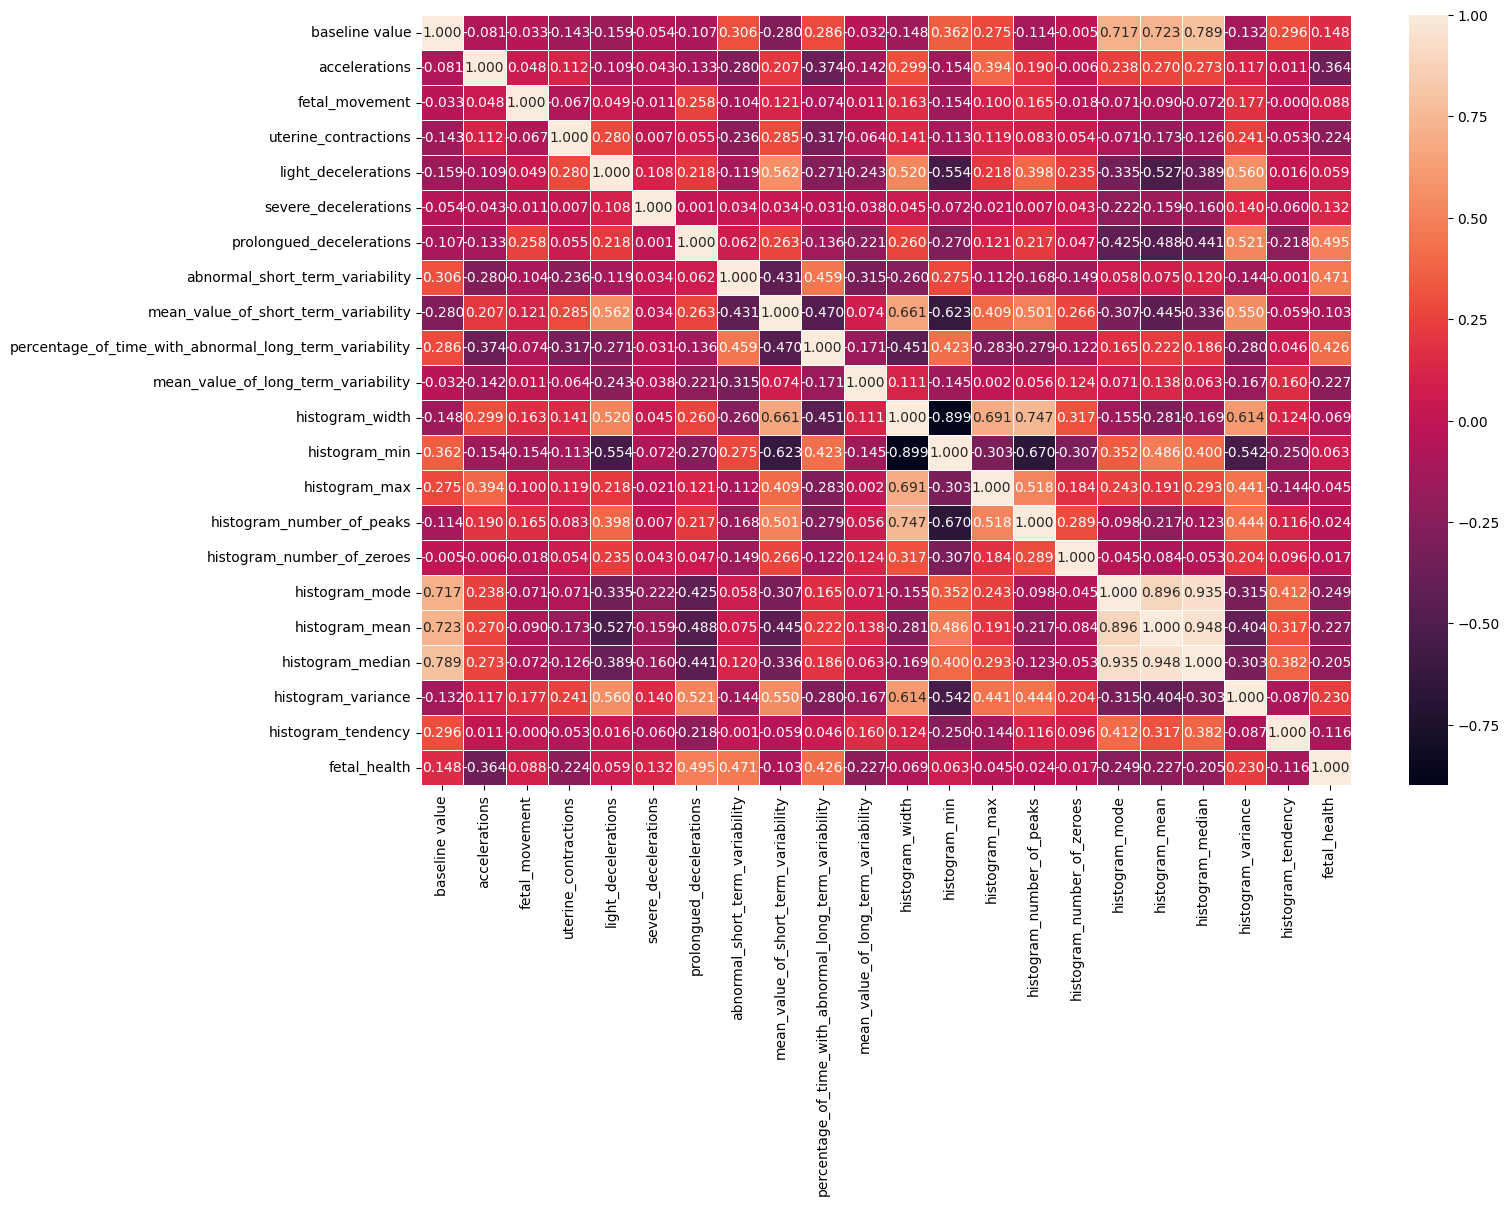

In [ ]:
#memvisualisasikan korelasi  antar-variabel dalam sebuah dataset
cor_mat= dataset.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True, linewidth=0.5, fmt=".3f")

##3) Memvalidasi data

In [ ]:
# menampilkan informasi dari dataset berupa tipe data, columns,
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    1914 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                1914 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
# digunakan untuk menampilkan data yang duplikat pada dataset
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2121,False
2122,False
2123,False
2124,False


In [ ]:
#menampilkan jumlah data yang duplicat dalam dataset
dataset.duplicated().sum()

5

In [ ]:
#menampilkan data yang kosong atau nan
dataset.isnull()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#menampilkan jumlah data yang kosong
dataset.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,212
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,212
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [ ]:
#digunakan untuk menampilkan data kolom yang memiliki nilai -
dataset_min = dataset.columns[(dataset<0).any()]
print(dataset_min)

Index(['histogram_tendency'], dtype='object')


## 4) Menentukan objek

In [ ]:
dataset.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,NaN,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
dataset.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,NaN,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


##5) Cleaning data

In [ ]:
# digunakan untuk menghapus data yang duplicate
dataclean= dataset.drop_duplicates()
dataclean[dataclean.duplicated(keep=False)]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health


In [ ]:
from sklearn.impute import SimpleImputer

# Menggunakan Imputasi Mean untuk semua kolom
imputer_numeric = SimpleImputer(strategy='mean')
dataclean = pd.DataFrame(imputer_numeric.fit_transform(dataclean), columns=dataclean.columns)

print("Data setelah imputasi missing values:\n", dataclean.isnull().sum())

Data setelah imputasi missing values:
 baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
h

In [ ]:
# menampilkan jumlah data null
dataclean.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


Mencari outliers dengan visualisasi data

Minmax digunakan untuk mengatasi outlier

visualisasi setelah di normalisasi

##6) Transformasi

In [ ]:
# menampilkan type data
dataclean.dtypes

,0
baseline value,float64
accelerations,float64
fetal_movement,float64
uterine_contractions,float64
light_decelerations,float64
severe_decelerations,float64
prolongued_decelerations,float64
abnormal_short_term_variability,float64
mean_value_of_short_term_variability,float64
percentage_of_time_with_abnormal_long_term_variability,float64


In [ ]:
# Menentukan target  dan fitur yang akan digunakan
X = dataclean.drop("fetal_health", axis=1) # Pilih kolom relevan
y = dataclean["fetal_health"]

####**Visualisasi DATA Fetal Health**




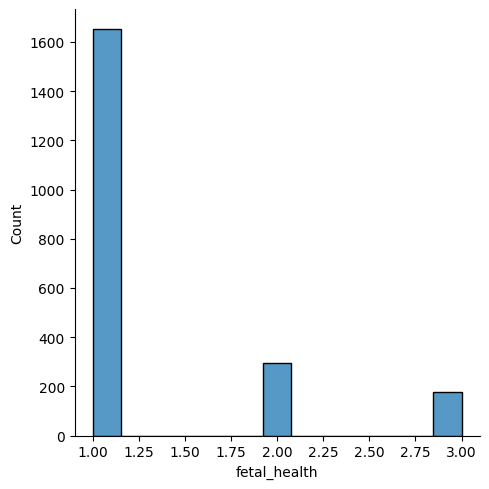

In [ ]:
# tampilkan visualisasi untuk melihat distribusi data pada kolom fetal health
sns.displot(dataclean.fetal_health)

####**oversamping pada data**



Berdasarkan hasil visualisasi data diatas dapat terlihat data pada 1.00, 2.00 dan 3.00 mengalami ketidak seimbangan sehingga perlu dilakukan oversampling dengan menambah data dari data minoritas

In [ ]:
#import library yang dibutuhkan
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
# Menentukan target  dan fitur yang akan digunakan
X = dataclean.drop("fetal_health", axis = 1)
y = dataclean["fetal_health"]

In [ ]:
# pisahkan train dan test dengan pembagian data uji 20 dan data training 80 dan random_state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
#melakukan smote
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Summarize results
print("Original dataset class distribution:")
print(y.value_counts())  # Print original distribution
print("\nAfter SMOTE:")
print(y_smote.value_counts())  # Print distribution after SMOTE
print("\y TEST:")
print(y_test.value_counts())  # Print distribution after SMOTE

Original dataset class distribution:
fetal_health
1.0    1651
2.0     294
3.0     176
Name: count, dtype: int64

After SMOTE:
fetal_health
2.0    1320
1.0    1320
3.0    1320
Name: count, dtype: int64
\y TEST:
fetal_health
1.0    331
2.0     59
3.0     35
Name: count, dtype: int64


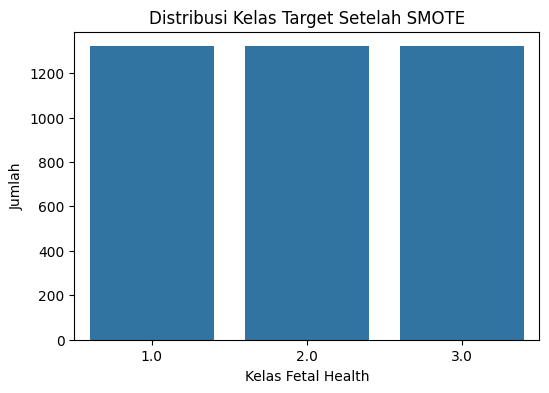

In [ ]:
# Visualisasi setelah SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_smote)
plt.title('Distribusi Kelas Target Setelah SMOTE')
plt.xlabel('Kelas Fetal Health')
plt.ylabel('Jumlah')

plt.show()

## 7)  Menentukan Label

In [ ]:
#mendefinisikan data x dan y dengan smote
X=X_smote
y=y_smote

In [ ]:
# membagi data dengan menggunakan train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

##8) Membangun Model

In [ ]:
# Import library yang dibutuhkan untuk pemodelan
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

####**a. Desicion Tree**




In [ ]:
# definisikan model
clf = DecisionTreeClassifier()

# Melatih model dengan data latih
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Mengevaluasi model untuk data test
y_test_pred=clf.predict(X_test)

#menampilkan akurasi skor
print("accuraccy: ")
print(accuracy_score(y_test,y_test_pred))

#Membuat laporan classification dengan Desicion Tree
print("\n Laporan klasifikasi model dengan menggunakan Desicion Tree")
print(classification_report(y_test,y_test_pred))

accuraccy: 
0.9595959595959596

 Laporan klasifikasi model dengan menggunakan Desicion Tree
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       264
         2.0       0.93      0.96      0.94       264
         3.0       0.98      0.98      0.98       264

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



####**b. SVM**

In [ ]:
sv_model = SVC(random_state=0)
sv_model.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_test_pred2 = sv_model.predict(X_test)

#Menampilkan akurasi score
print("accuracy: ")
print(accuracy_score(y_test_pred2,y_test))

#Menampilkan laporan klasifikasi
print("\n Laporan klasifikasi model dengan menggunakan SVM ")
print(classification_report(y_test_pred2, y_test))

accuracy: 
0.8371212121212122

 Laporan klasifikasi model dengan menggunakan SVM 
              precision    recall  f1-score   support

         1.0       0.83      0.84      0.84       261
         2.0       0.82      0.78      0.80       280
         3.0       0.86      0.90      0.88       251

    accuracy                           0.84       792
   macro avg       0.84      0.84      0.84       792
weighted avg       0.84      0.84      0.84       792



####**c. Random Fores**

In [ ]:
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [ ]:
y_test_pred3= rf.predict(X_test)

#Menampilkan akurasi score
print("accuracy: ")
print(accuracy_score(y_test_pred3, y_test))

# Menampilkan  laporan klasifikasi
print("\n Laporan klasifikasi model dengan menggunakan random forest")
print(classification_report(y_test_pred3, y_test))

accuracy: 
0.9772727272727273

 Laporan klasifikasi model dengan menggunakan random forest
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       258
         2.0       0.98      0.95      0.97       273
         3.0       0.98      1.00      0.99       261

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



####**d. Logistik regression**

In [ ]:
#Mengevalusi Logistic Regression
lr = LogisticRegression(random_state=0, class_weight='balanced')
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=0)

In [ ]:
# Mengevaluasi data test Logistic regression
y_test_pred4 =lr.predict(X_test)

#Menampilkan akurasi score
print("accuracy: ")
print(accuracy_score(y_test_pred4, y_test))

# Menampilkan hasil laporan dengan classification report
print("\n Laporan klasifikasi dengan menggunakan Logistic regression")
print(classification_report(y_test_pred4, y_test))

accuracy: 
0.8080808080808081

 Laporan klasifikasi dengan menggunakan Logistic regression
              precision    recall  f1-score   support

         1.0       0.77      0.81      0.79       250
         2.0       0.76      0.74      0.75       270
         3.0       0.90      0.87      0.88       272

    accuracy                           0.81       792
   macro avg       0.81      0.81      0.81       792
weighted avg       0.81      0.81      0.81       792



####**e. KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#
y_test_pred5 = knn.predict(X_test)

#Menampilkan akurasi score
print("accuracy: ")
print(accuracy_score(y_test_pred5, y_test))

# Menampilkan hasil laporan dengan classification report
print("\n Laporan klasifikasi dengan menggunakan KNN")
print(classification_report(y_test_pred5, y_test))

accuracy: 
0.9356060606060606

 Laporan klasifikasi dengan menggunakan KNN
              precision    recall  f1-score   support

         1.0       0.84      0.99      0.91       224
         2.0       0.98      0.86      0.92       302
         3.0       0.98      0.98      0.98       266

    accuracy                           0.94       792
   macro avg       0.94      0.94      0.94       792
weighted avg       0.94      0.94      0.94       792



####**f. Naive bayes**

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_test_pred6 =NB.predict(X_test)

# Menampilkan accuracy score
print("Accuracy: ")
print(accuracy_score(y_test_pred6, y_test))

#Menampilkan laporan classification dari Naive Bayes
print(" Laporan Klasifikasi dari pemodelan denagn Naive Bayes")
print(classification_report(y_test_pred6, y_test))

Accuracy: 
0.7651515151515151
 Laporan Klasifikasi dari pemodelan denagn Naive Bayes
              precision    recall  f1-score   support

         1.0       0.74      0.87      0.80       226
         2.0       0.87      0.65      0.74       351
         3.0       0.69      0.84      0.76       215

    accuracy                           0.77       792
   macro avg       0.77      0.79      0.77       792
weighted avg       0.78      0.77      0.76       792



####**i. Gradian boosting**

In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_test_pred7 =gb_model.predict(X_test)

# Menampilkan accuracy score
print("Accuracy: ")
print(accuracy_score(y_test_pred7, y_test))

#Menampilkan laporan classification dari Gradien Boosting
print(" Laporan Klasifikasi dari pemodelan denagn Gradien Boosting")
print(classification_report(y_test_pred7, y_test))

Accuracy: 
0.9633838383838383
 Laporan Klasifikasi dari pemodelan denagn Gradien Boosting
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       254
         2.0       0.98      0.92      0.95       279
         3.0       0.98      1.00      0.99       259

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792




##9) Mengevaluasi **Model**

a) Desicion Tree

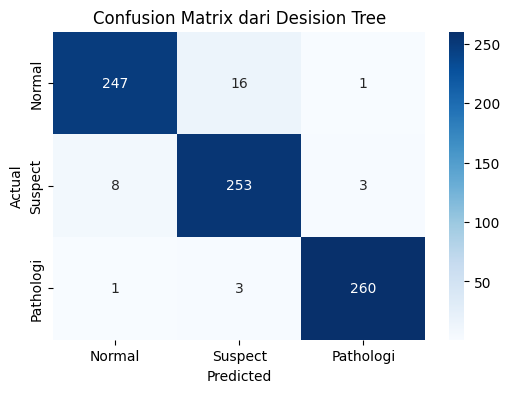

In [ ]:
#Menvisualisasikan dengan menggunakan confusion matrix pada data latih (Normal), 2 (Suspect) and 3 (Pathological)
cm_cf = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_cf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal','Suspect','Pathologi'],
            yticklabels=['Normal','Suspect','Pathologi'])
plt.title("Confusion Matrix dari Desision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

b) SVM

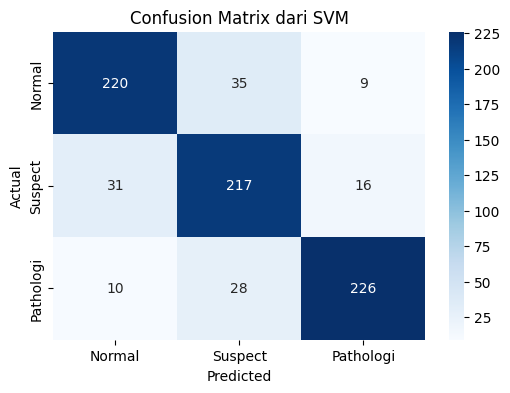

In [ ]:
#Menvisualisasikan dengan menggunakan confusion matrix pada data latih
cm_sv = confusion_matrix(y_test, y_test_pred2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_sv, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal','Suspect','Pathologi'],
            yticklabels=['Normal','Suspect','Pathologi'])
plt.title("Confusion Matrix dari SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C) Random Forest

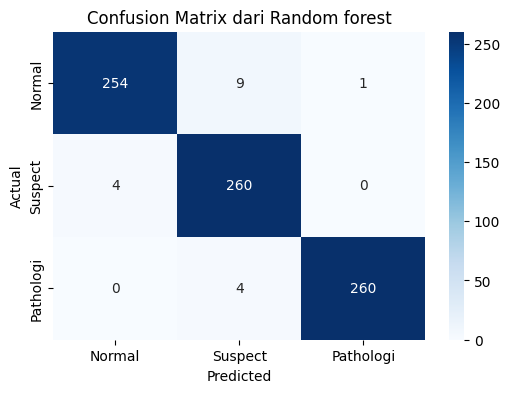

In [ ]:
#Menvisualisasikan dengan menggunakan confusion matrix pada data latih
cm_rf = confusion_matrix(y_test, y_test_pred3)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
           xticklabels=['Normal','Suspect','Pathologi'],
            yticklabels=['Normal','Suspect','Pathologi'])
plt.title("Confusion Matrix dari Random forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

d) Logistic regression

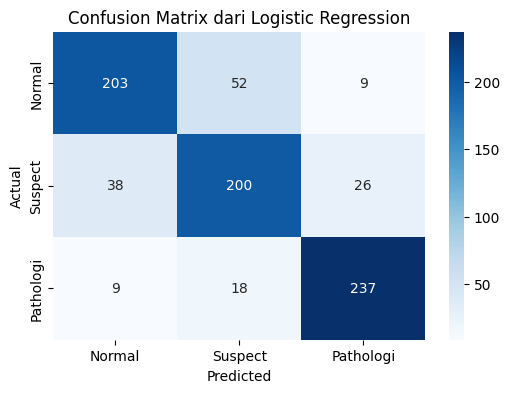

In [ ]:
#Menvisualisasikan dengan menggunakan confusion matrix pada data latih
cm_lr = confusion_matrix(y_test, y_test_pred4)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
             xticklabels=['Normal','Suspect','Pathologi'],
            yticklabels=['Normal','Suspect','Pathologi'])
plt.title("Confusion Matrix dari Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

e) KNN

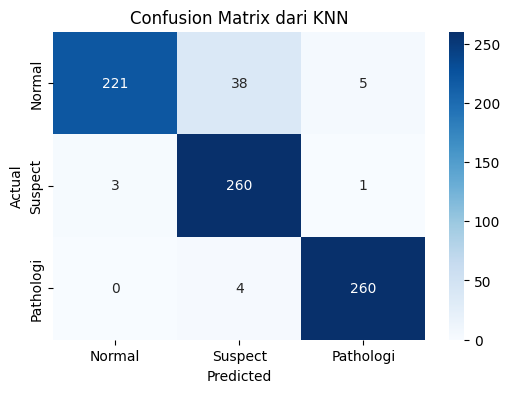

In [ ]:
#Menvisualisasikan dengan menggunakan confusion matrix pada data latih
cm_knn = confusion_matrix(y_test, y_test_pred5)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal','Suspect','Pathologi'],
            yticklabels=['Normal','Suspect','Pathologi'])
plt.title("Confusion Matrix dari KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

f) Naive Bayes

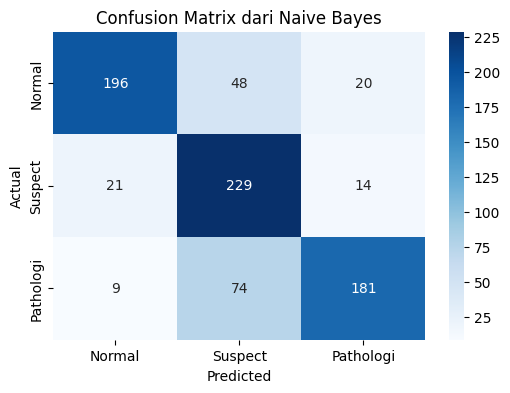

In [ ]:
#Menvisualisasikan dengan menggunakan confusion matrix pada data latih
cm_nb = confusion_matrix(y_test, y_test_pred6)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
           xticklabels=['Normal','Suspect','Pathologi'],
            yticklabels=['Normal','Suspect','Pathologi'])
plt.title("Confusion Matrix dari Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

g) Gradien boosting

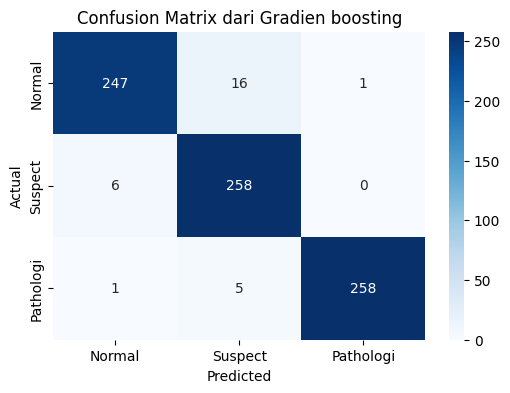

In [ ]:
#Menvisualisasikan dengan menggunakan confusion matrix pada data latih
cm_gb = confusion_matrix(y_test, y_test_pred7)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal','Suspect','Pathologi'],
            yticklabels=['Normal','Suspect','Pathologi'])
plt.title("Confusion Matrix dari Gradien boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##10) optimalisasi Model

Optimasi tidak dilakukan pada pemodelan ini dikarenakan model yang digunakan mendapat akurasi dan recall yang sangat baik.

In [ ]:
model_names = ['Decision Tree', 'SVM', 'Random Forest', 'Logistic Regression', 'KNN', 'Naive Bayes', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, y_test_pred),
    accuracy_score(y_test, y_test_pred2),
    accuracy_score(y_test, y_test_pred3),
    accuracy_score(y_test, y_test_pred4),
    accuracy_score(y_test, y_test_pred5),
    accuracy_score(y_test, y_test_pred6),
    accuracy_score(y_test, y_test_pred7)
]

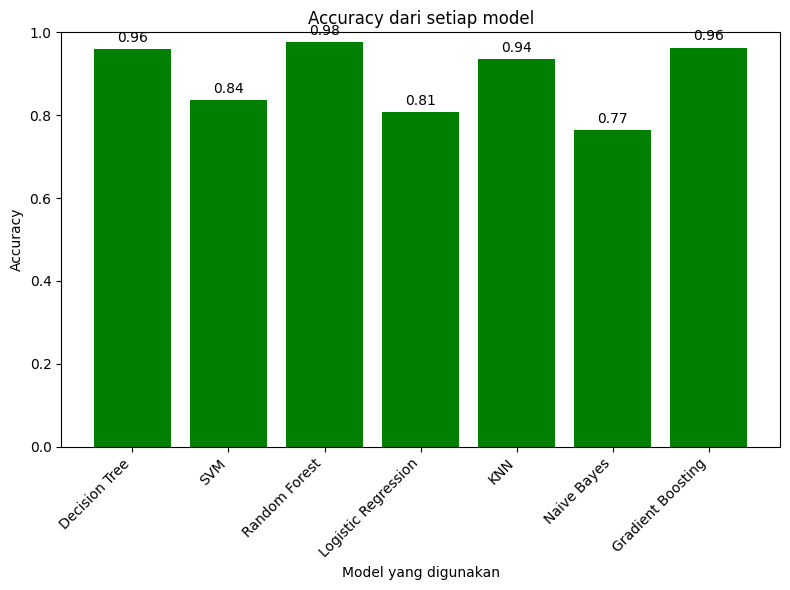

In [ ]:
# menampilkan visualisasi akurasi dari setiap model
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['green'])
plt.xlabel('Model yang digunakan')
plt.ylabel('Accuracy')
plt.title('Accuracy dari setiap model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)


for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

##11) Conclusion

Berdasarkan pengujian yan telah dilakukan didapat Evaluasi model menunjukkan hasil sebagai berikut:

 a. laporan klasifikasi untuk beberapa model yang telah dievaluasi:

 - Desicion tree memperoleh akurasi 0.96, presisi 96, recall 0.96 dan f1 score 0.96
 - SVM memperoleh memperoleh akurasi 0.84, presisi 84, recall 0.84 dan f1 score 0.84
 - Random forest memperoleh akurasi 0.98, presisi 98, recall 0.98 dan f1 score 0.98.
 - Logistik regresion memperoleh akurasi 0.84, presisi 0.84, recall 0.84 dan f1 score 0.84
 - KNN memperoleh akurasi 0.94, presisi 94, recall 0.94 dan f1 score 0.94
 - Naive bayes memperoleh akurasi 0.77, presisi 0.77, recall 0.77 dan f1 score 0.77
 - Gradien boosting memperoleh akurasi 0.96, presisi 96, recall 0.96 dan f1 score 0.96
  
   
 b. Dari hasil evalusi ini dapat disimpulkan model Random Forest menjadi pilihan yang baik untuk memprediksi dengan akurasi, recall dan presisi yang tinggi dan stabil.